
Optimized Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505 (1.97 KB)

 Trainable params: 505 (1.97 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training with Early Stopping...
Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5329 - loss: 0.7471 - val_accuracy: 0.4667 - val_loss: 0.7254
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5522 - loss: 0.7072 - val_accuracy: 0.5000 - val_loss: 0.7067
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5646 - loss: 0.6844 - val_accuracy: 0.5167 - val_loss: 0.6931
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5384 - loss: 0.6827 - val_accuracy: 0.5333 - val_loss: 0.6821
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5514 - loss: 0.6825 - val_accuracy: 0.6500 - val_loss: 0.6744
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4959 - loss: 0.7112 - val_accuracy: 0.6167 - val_loss: 0.6695
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6129 - loss: 0.6729 - val_accuracy: 0.6000 - val_loss: 0.6665
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5287 -

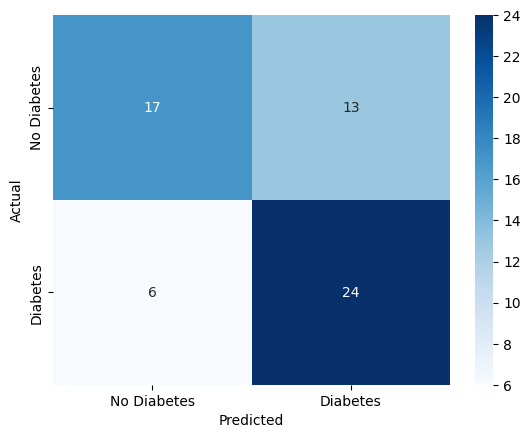


Plotting training history...


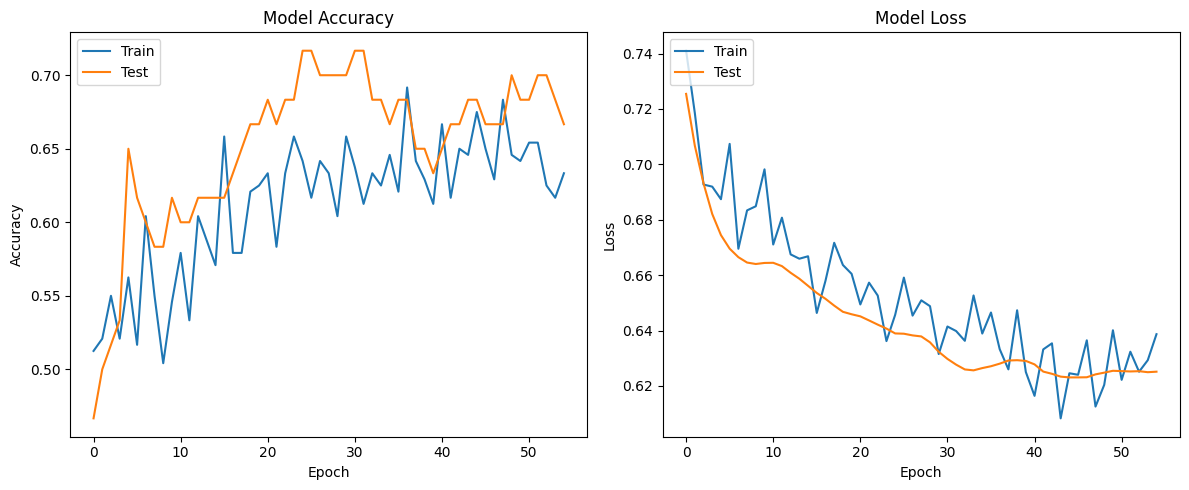

In [45]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
# Import EarlyStopping and the Adam optimizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# --- 1. Load and Prepare Data ---
file_name = '/content/dataSet.csv'

# --- 2. Load and Preprocess the Data ---
df = pd.read_csv(file_name)
scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'BMI']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# --- 3. Prepare Data for the Model ---
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# This model uses the optimal hyperparameters from your tuning report.
model = tf.keras.models.Sequential([
    # Optimal Layer 1: 24 neurons
    tf.keras.layers.Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3), # Keeping dropout for regularization

    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dropout(0.3), # Keeping dropout for regularization



    # Output layer remains the same for binary classification.
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Configure the Adam optimizer with the optimal learning rate of 0.001
optimizer =Adam(learning_rate=0.001)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("\nOptimized Model Architecture:")
model.summary()

# -------------------------------------------------------------------
# --- 6. Train the Model with Early Stopping ---
# -------------------------------------------------------------------
print("\nStarting model training with Early Stopping...")
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping])

# -------------------------------------------------------------------
# --- 7. Evaluate the Model ---
# -------------------------------------------------------------------
print("\nEvaluating model performance on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# --- 8. Analyze Results ---
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nPlotting training history...")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()